In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [3]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # 画图
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

In [4]:
def plot_subfigure(X, Y, subplot, title, transform):
    # 将X进行降维操作，变成两维的数据,这样才能用于后续的绘图操作
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    # 将X降至二维数据后，寻找每一维度的最大最小值
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)
    
    # 获取类别
    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray')
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
               facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
               facecolors='none', linewidths=2, label='Class 2')
    
    # 超平面绘制
    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'r--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 1:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")

In [5]:
# 数据生成
X1, Y1 = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,  # 该参数控制是否有类别缺省的数据，False表示没有
                                      random_state=1)
print('X1 shape:', X1.shape, "\nX1 data:\n", X1[:5])
print('Y1 shape:', Y1.shape, "\nY1 data:\n", Y1[:5])  # 注y有：[1,0],[0,1],[1,1]的取值方式

X1 shape: (100, 20) 
X1 data:
 [[ 3.  0.  2.  1.  6.  2.  3.  4.  0.  6.  2.  7.  0.  7.  3.  3.  0.  1.
   8.  3.]
 [ 0.  3.  3.  5.  5.  1.  0.  4.  3.  2.  2.  2.  0.  1.  5.  8.  7.  7.
   0.  5.]
 [ 0.  3.  1.  1.  3.  2.  0.  2.  0.  5.  2.  5.  1.  1.  2.  7.  2.  6.
   0. 13.]
 [ 1.  0.  0.  1.  0.  1.  0.  3.  0.  8.  4.  3.  0.  5.  2.  4.  4.  6.
   1.  5.]
 [ 1.  1.  0.  3.  4.  6.  4.  4.  0.  2.  5.  4.  0.  6.  1.  3.  3.  7.
   3.  2.]]
Y1 shape: (100, 2) 
Y1 data:
 [[0 1]
 [1 0]
 [1 0]
 [1 1]
 [0 1]]


In [6]:
# 数据生成
X2, Y2 = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,  # 该参数控制是否有类别缺省的数据，False表示没有
                                      random_state=1)
print('X2 shape:', X2.shape, "\nX2 data:\n", X2[:5])
print('Y2 shape:', Y2.shape, "\nY2 data:\n", Y2[:5])  # 注y有：[1,0],[0,1],[1,1],[0,0]的取值方式

X2 shape: (100, 20) 
X2 data:
 [[5. 3. 2. 2. 3. 1. 3. 6. 3. 2. 4. 3. 3. 5. 1. 2. 1. 2. 2. 3.]
 [4. 2. 3. 2. 1. 4. 2. 4. 2. 2. 3. 2. 0. 7. 4. 3. 3. 5. 2. 1.]
 [0. 0. 3. 5. 8. 3. 3. 1. 3. 1. 2. 2. 0. 3. 0. 4. 1. 2. 4. 3.]
 [4. 0. 1. 2. 3. 6. 2. 5. 1. 5. 2. 3. 0. 1. 2. 2. 0. 3. 4. 4.]
 [0. 2. 3. 2. 1. 2. 0. 2. 1. 4. 1. 3. 1. 1. 1. 2. 2. 4. 0. 2.]]
Y2 shape: (100, 2) 
Y2 data:
 [[0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 0]]


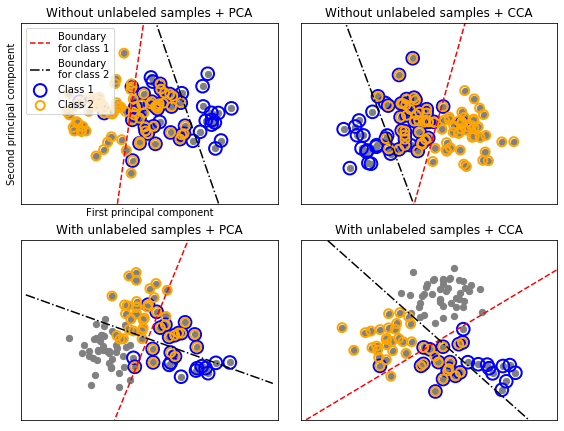

In [7]:
plt.figure(figsize=(8, 6))
plot_subfigure(X1, Y1, 1, "Without unlabeled samples + PCA", "pca")
plot_subfigure(X1, Y1, 2, "Without unlabeled samples + CCA", "cca")

plot_subfigure(X2, Y2, 3, "With unlabeled samples + PCA", "pca")
plot_subfigure(X2, Y2, 4, "With unlabeled samples + CCA", "cca")


plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()